In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read the data and do some preparations.

In [2]:
# read the data from the csv file
data0 = pd.read_csv('data0.csv')

# delete _V0 from the column names
data0.columns = data0.columns.str.replace('_V0', '')

# read the data from the excel file
non_cancer0 = pd.read_excel('non_cancer0.xlsx')

# delete _V0 from the column names
non_cancer0.columns = non_cancer0.columns.str.replace('_V0', '')

# drop the first column
data0.drop(['Unnamed: 0'], axis=1, inplace=True)
non_cancer0.drop(['Unnamed: 0'], axis=1, inplace=True)

# combine data0 and non_cancer0
data = pd.concat([data0, non_cancer0], axis=1)

# drop the rows with missing values in the first 55 columns
data.dropna(axis=0, how='any', subset=data.columns[0:55], inplace=True)

In [3]:
# build a dataframe for individuals with a single disease
single_data = data.copy()

# drop the rows which have values in the 56th column
single_data.drop(single_data[single_data.iloc[:, 55].isnull() == False].index, inplace=True)

# drop the last 33 columns
single_data.drop(single_data.columns[55:], axis=1, inplace=True)

# check the data
single_data.head()

,White blood cell (leukocyte) count,Red blood cell (erythrocyte) count,Haemoglobin concentration,Haematocrit percentage,Mean corpuscular volume,Mean corpuscular haemoglobin,Mean corpuscular haemoglobin concentration,Red blood cell (erythrocyte) distribution width,Platelet count,Platelet crit,...,Glycated haemoglobin (HbA1c),HDL cholesterol,IGF-1,LDL direct,Phosphate,Total bilirubin,Total protein,Triglycerides,Urate,"Non-cancer illness code, self-reported"
0,6.84,4.376,13.11,36.58,83.58,29.95,35.83,13.84,246.4,0.242,...,38.2,1.124,16.450,4.030,1.147,5.57,75.40,2.721,371.5,1330.0
5,6.90,5.090,15.50,45.00,88.20,30.40,34.40,13.80,170.0,0.144,...,29.1,1.182,25.479,2.301,1.113,29.22,72.76,1.257,275.9,1065.0
21,4.98,4.574,15.22,42.27,92.43,33.28,36.00,12.79,266.4,0.216,...,36.6,1.508,19.383,4.499,0.932,6.36,76.75,3.957,393.8,1476.0
28,5.77,4.454,14.37,41.83,93.91,32.26,34.36,13.05,294.2,0.269,...,31.7,1.344,27.104,3.359,1.092,6.93,70.28,1.979,320.3,1474.0
36,5.60,4.440,14.00,41.00,92.40,31.50,34.00,13.60,335.0,0.256,...,40.2,1.282,18.298,3.047,0.861,7.51,69.15,1.346,400.7,99999.0


### Do log transformation and normalization.

In [4]:
# define functions to standardize the data
def standardize(x):
    return (x - x.mean()) / x.std()

def standardize_data(data):
    data_std = pd.DataFrame(columns=data.columns)
    for i in range(data.shape[1]):
        data_std.iloc[:, i] = standardize(data.iloc[:, i])
    return data_std

In [5]:
# take log transformation for columns with mean > 1
log_list = []

for i in range(54):
    if single_data.iloc[:, i].mean() > 1:
        single_data.iloc[:, i] = np.log(single_data.iloc[:, i])
        log_list.append(i)

print(log_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 14, 18, 19, 20, 21, 24, 26, 27, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]


/Users/xt319/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/xt319/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/xt319/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/xt319/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/xt319/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/xt319/opt/anaconda3/lib/python3.9/site-packages/panda

In [6]:
# drop the rows with infinite values
single_data.drop(single_data[single_data.iloc[:, 0:55].isin([np.inf, -np.inf]).any(1)].index, inplace=True)

# add (log) to the column names according to the log_list
for i in log_list:
    single_data.rename(columns={single_data.columns[i]: single_data.columns[i] + '(log)'}, inplace=True)

/var/folders/83/985nqkzx2qz9vgyvjg1p3c9w0000gn/T/ipykernel_3801/72513174.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  single_data.drop(single_data[single_data.iloc[:, 0:55].isin([np.inf, -np.inf]).any(1)].index, inplace=True)


In [7]:
single_data.iloc[:,0:54] = standardize_data(single_data.iloc[:,0:54])

/var/folders/83/985nqkzx2qz9vgyvjg1p3c9w0000gn/T/ipykernel_3801/3368539109.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_std.iloc[:, i] = standardize(data.iloc[:, i])


In [8]:
# create a new dataframe with the same column names as data0
disease1065 = pd.DataFrame(columns=single_data.columns[0:54])

# check the data
disease1065.head()

,White blood cell (leukocyte) count(log),Red blood cell (erythrocyte) count(log),Haemoglobin concentration(log),Haematocrit percentage(log),Mean corpuscular volume(log),Mean corpuscular haemoglobin(log),Mean corpuscular haemoglobin concentration(log),Red blood cell (erythrocyte) distribution width(log),Platelet count(log),Platelet crit,...,Glucose(log),Glycated haemoglobin (HbA1c)(log),HDL cholesterol(log),IGF-1(log),LDL direct(log),Phosphate(log),Total bilirubin(log),Total protein(log),Triglycerides(log),Urate(log)


### Build the blood profile for some diseases.

In [9]:
disease_code = 1065
n,m = single_data.shape

# search row by row
for i in range(n):
    if single_data.iloc[i, -1] == float(disease_code):
        # add a row to disease1065
        disease1065 = pd.concat([disease1065, pd.DataFrame(single_data.iloc[i, 0:54]).T], axis=0)

In [10]:
disease1065

,White blood cell (leukocyte) count(log),Red blood cell (erythrocyte) count(log),Haemoglobin concentration(log),Haematocrit percentage(log),Mean corpuscular volume(log),Mean corpuscular haemoglobin(log),Mean corpuscular haemoglobin concentration(log),Red blood cell (erythrocyte) distribution width(log),Platelet count(log),Platelet crit,...,Glucose(log),Glycated haemoglobin (HbA1c)(log),HDL cholesterol(log),IGF-1(log),LDL direct(log),Phosphate(log),Total bilirubin(log),Total protein(log),Triglycerides(log),Urate(log)
5,0.194951,1.351849,1.014271,1.065679,-0.693696,-0.637396,-0.156558,0.484470,-1.584792,-1.859031,...,-0.626250,-1.427754,-0.737110,0.743235,-1.913640,-0.195657,3.192639,0.129304,-0.343955,-0.272384
55,1.368754,-0.614378,-0.437686,-0.596949,0.089631,0.312026,0.464914,0.225353,-0.206720,0.622858,...,0.051129,1.052398,0.315407,-0.065241,0.840731,1.064644,-0.844796,0.489663,-0.057747,0.214018
82,0.985646,0.206730,-0.658488,-0.513575,-1.297904,-1.299421,-0.362721,0.484470,0.667701,0.831421,...,-0.823677,0.235555,-1.372895,-0.417656,-0.946237,1.085682,0.723794,-1.344164,1.082435,1.264517
84,-1.762421,0.364843,0.483290,0.702497,0.572917,0.160060,-0.653384,-0.050070,-0.033432,-0.899645,...,0.711372,-2.473739,-0.275246,1.050361,0.345380,0.741250,0.762578,1.923188,-0.001462,1.317783
179,-0.113701,0.676766,0.751847,0.932774,0.399488,0.080753,-0.507754,-0.943998,-1.046142,-1.608756,...,0.158971,-0.503925,-0.224065,0.694539,-2.948978,1.164020,0.250716,0.169419,-0.108695,0.195707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442487,-1.800522,-0.311921,0.168479,0.093420,0.778271,0.727533,0.150449,0.249082,1.046841,0.435152,...,1.235155,-0.675319,0.882830,0.820001,0.026341,-0.387374,0.693736,0.814061,0.069898,0.255201
442518,-0.573012,0.930531,0.007779,0.344190,-1.126967,-1.484289,-1.093907,2.042464,-0.264871,-0.294815,...,-1.356736,-0.241868,0.521877,-0.339104,-0.327232,0.154774,1.133112,-0.110708,-0.223564,-0.266855
442536,2.653551,1.136540,1.205406,1.445512,0.449185,0.046657,-0.674237,-0.880293,0.097927,0.351728,...,0.646605,-0.625970,-0.812593,0.829269,0.071689,-2.609631,-0.870287,-0.187162,0.647973,-0.606112
442537,-0.573012,-0.989655,-0.658488,-1.060254,-0.060092,0.507126,1.154972,-1.635218,-0.587909,0.622858,...,0.206348,0.388508,-1.058977,0.795917,0.297196,0.142770,-0.778029,-1.508147,0.534460,0.047238


/Users/xt319/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


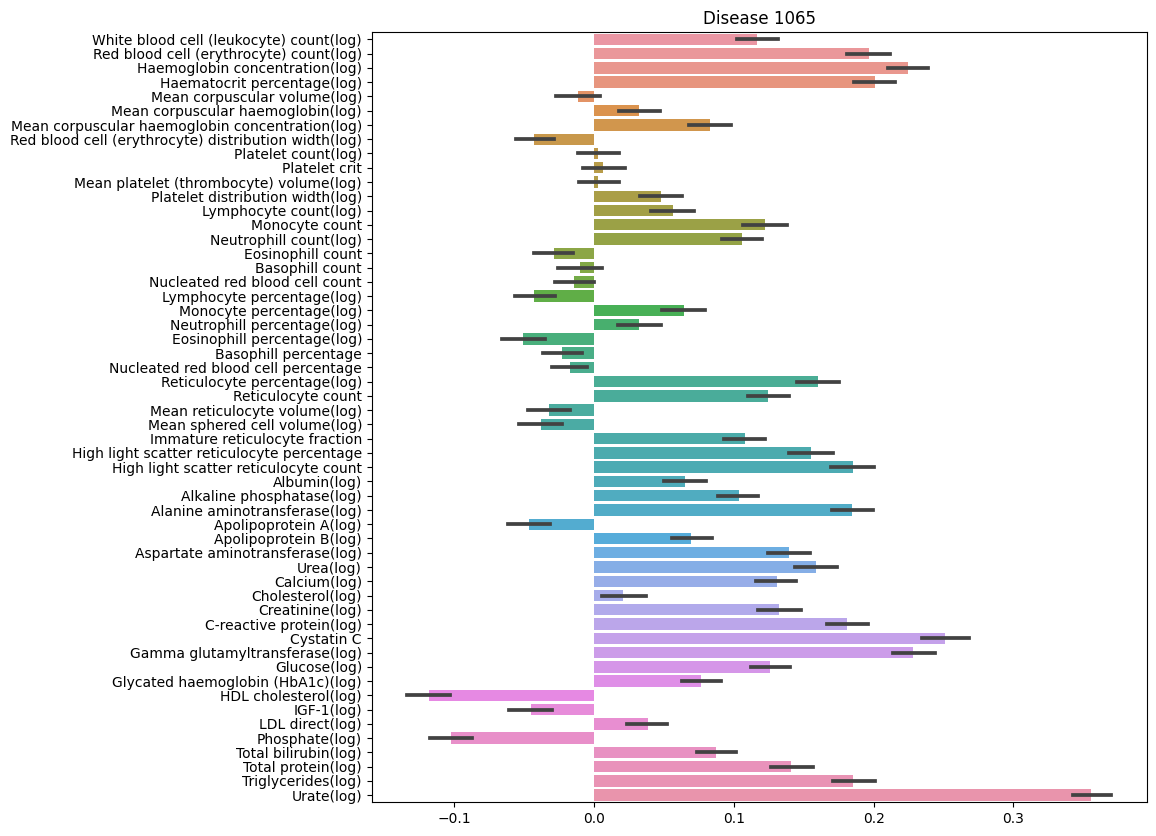

In [11]:
# draw a barplot to show the mean and the confidence interval of each feature
plt.figure(figsize=(10, 10))
sns.barplot(data=disease1065, ci=95, orient='h') # ci: confidence interval by bootstrapping
plt.title('Disease 1065')
plt.show()

/Users/xt319/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


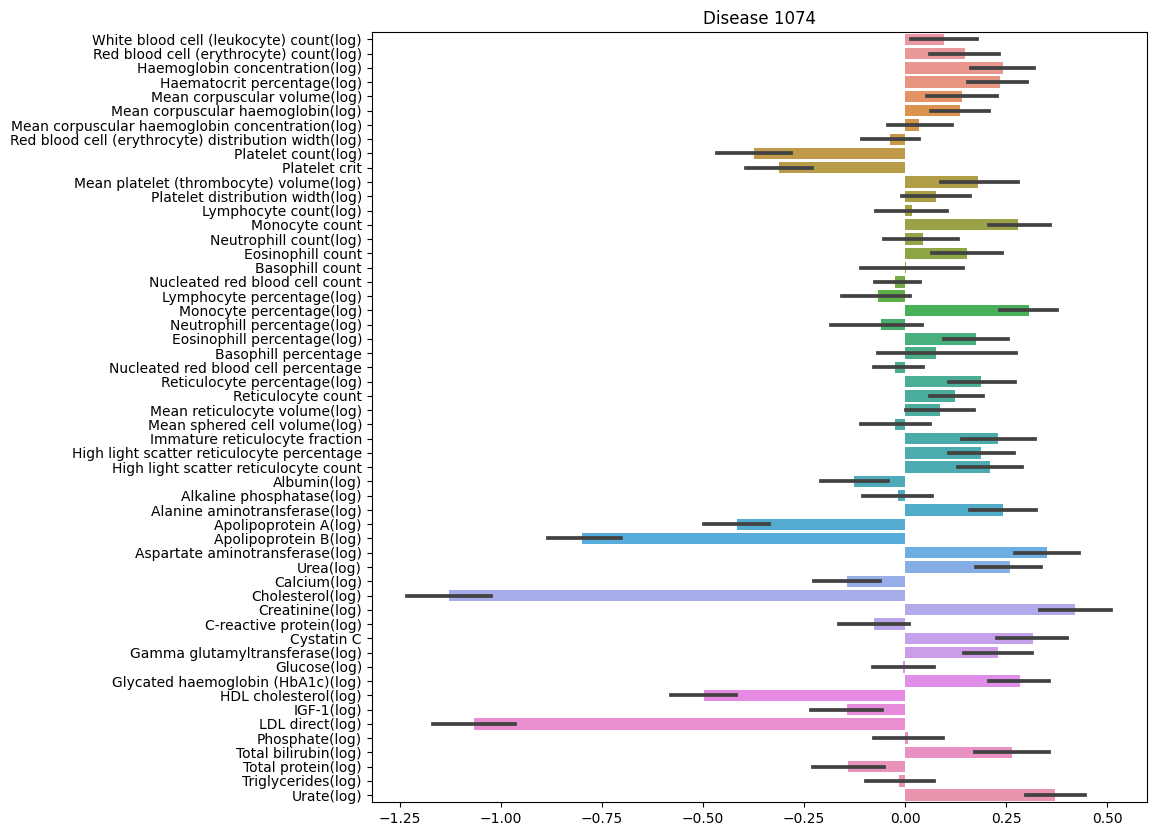

In [12]:
disease_code = 1074
n,m = single_data.shape

# create a new dataframe with the same column names as data0
disease1074 = pd.DataFrame(columns=single_data.columns[0:54])

# search row by row
for i in range(n):
    if single_data.iloc[i, -1] == float(disease_code):
        # add a row to disease1074
        disease1074 = pd.concat([disease1074, pd.DataFrame(single_data.iloc[i, 0:54]).T], axis=0)

# draw a barplot to show the mean and the confidence interval of each feature
plt.figure(figsize=(10, 10))
sns.barplot(data=disease1074, ci=95, orient='h')
plt.title('Disease 1074')
plt.show()

/Users/xt319/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


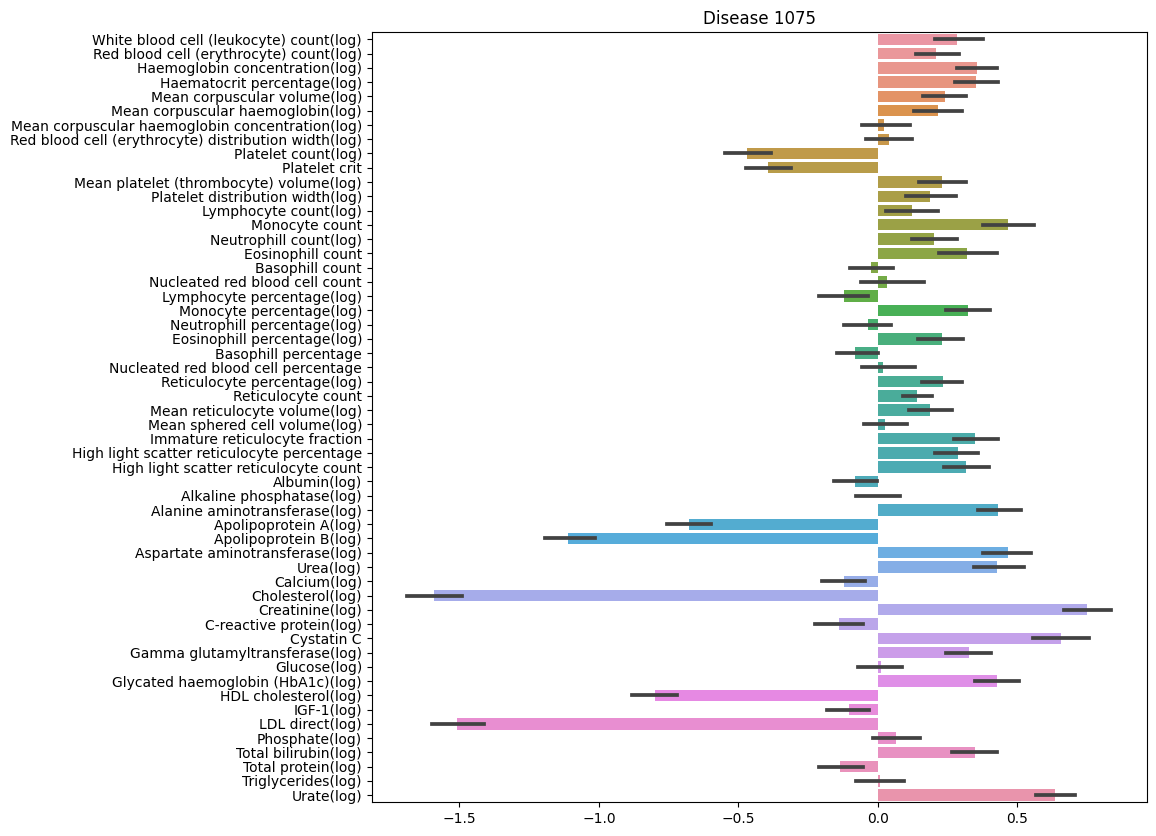

In [13]:
disease_code = 1075
n,m = single_data.shape

# create a new dataframe with the same column names as data0
disease1075 = pd.DataFrame(columns=single_data.columns[0:54])

# search row by row
for i in range(n):
    if single_data.iloc[i, -1] == float(disease_code):
        # add a row to disease1075
        disease1075 = pd.concat([disease1075, pd.DataFrame(single_data.iloc[i, 0:54]).T], axis=0)

# draw a barplot to show the mean and the confidence interval of each feature
plt.figure(figsize=(10, 10))
sns.barplot(data=disease1075, ci=95, orient='h')
plt.title('Disease 1075')
plt.show()

/Users/xt319/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


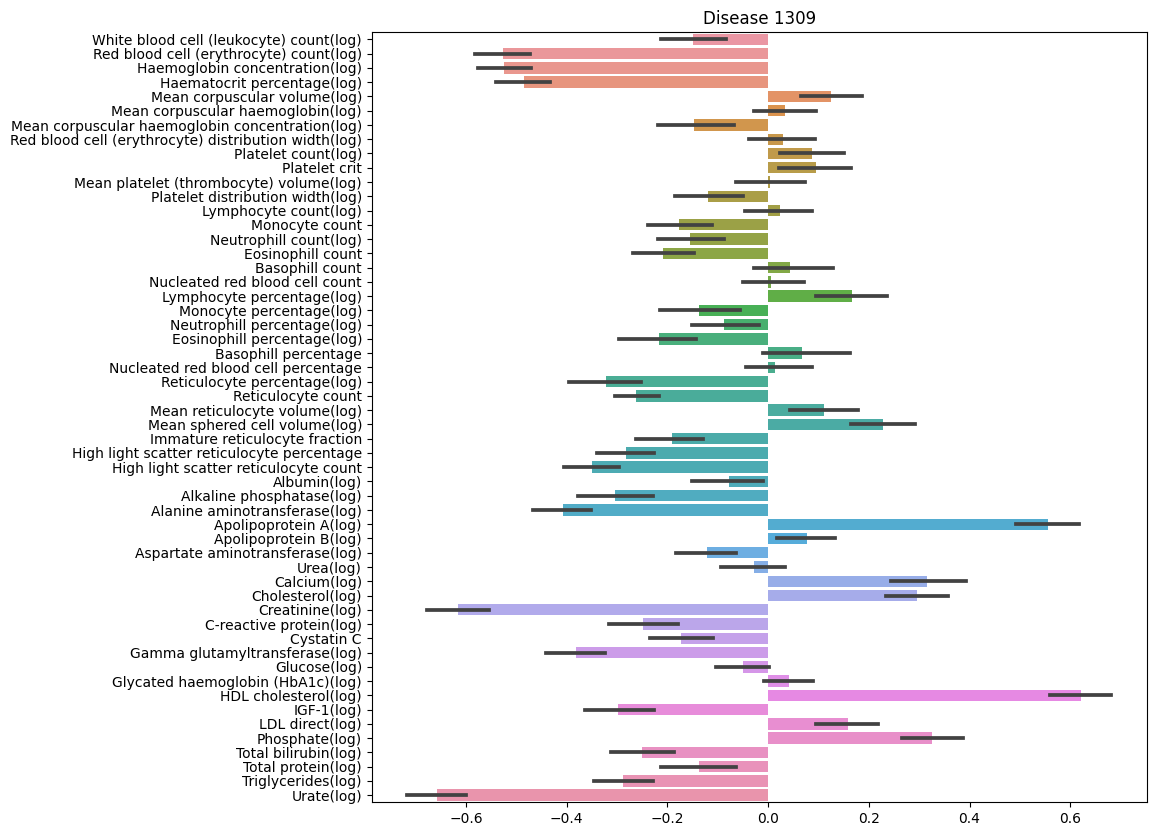

In [14]:
disease_code = 1309
n,m = single_data.shape

# create a new dataframe with the same column names as data0
disease1309 = pd.DataFrame(columns=single_data.columns[0:54])

# search row by row
for i in range(n):
    if single_data.iloc[i, -1] == float(disease_code):
        # add a row to disease1309
        disease1309 = pd.concat([disease1309, pd.DataFrame(single_data.iloc[i, 0:54]).T], axis=0)

# draw a barplot to show the mean and the confidence interval of each feature
plt.figure(figsize=(10, 10))
sns.barplot(data=disease1309, ci=95, orient='h')
plt.title('Disease 1309')
plt.show()

/Users/xt319/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


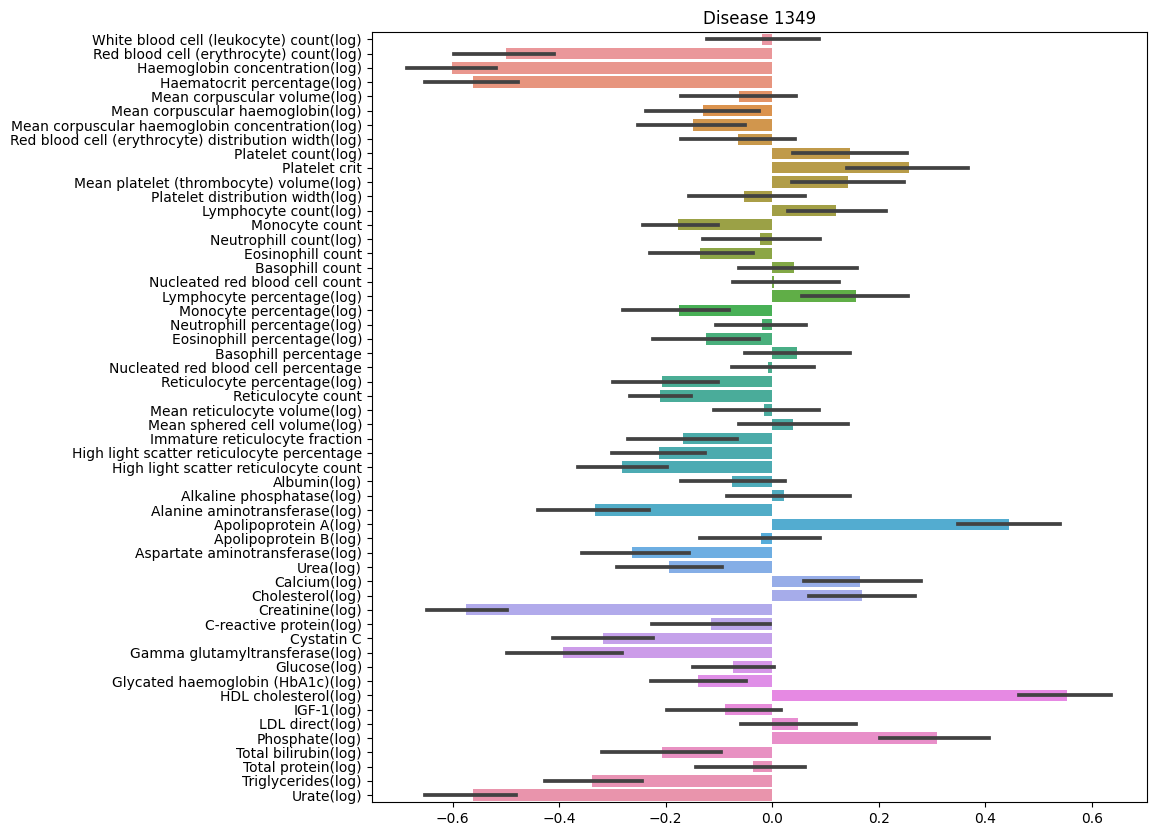

In [15]:
disease_code = 1349
n,m = single_data.shape

# create a new dataframe with the same column names as data0
disease1349 = pd.DataFrame(columns=single_data.columns[0:54])

# search row by row
for i in range(n):
    if single_data.iloc[i, -1] == float(disease_code):
        # add a row to disease1349
        disease1349 = pd.concat([disease1349, pd.DataFrame(single_data.iloc[i, 0:54]).T], axis=0)

# draw a barplot to show the mean and the confidence interval of each feature
plt.figure(figsize=(10, 10))
sns.barplot(data=disease1349, ci=95, orient='h')
plt.title('Disease 1349')
plt.show()

/Users/xt319/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


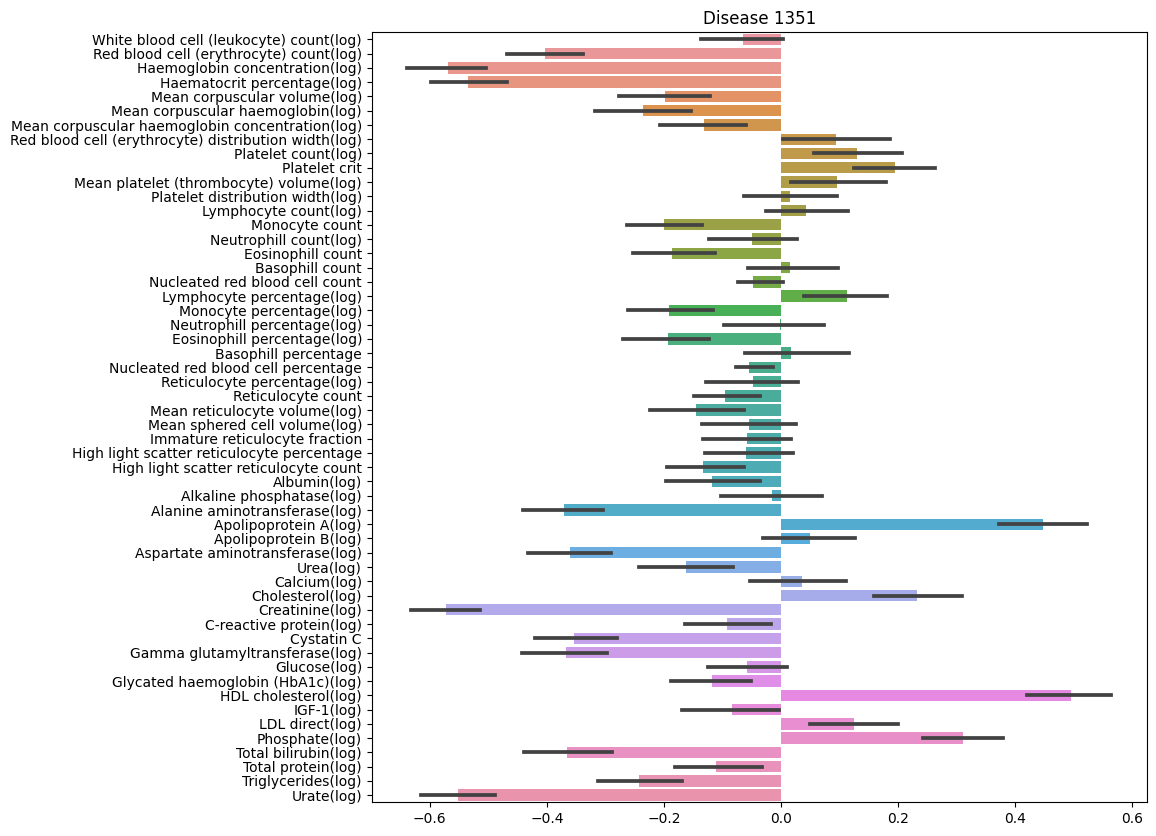

In [16]:
disease_code = 1351
n,m = single_data.shape

# create a new dataframe with the same column names as data0
disease1351 = pd.DataFrame(columns=single_data.columns[0:54])

# search row by row
for i in range(n):
    if single_data.iloc[i, -1] == float(disease_code):
        # add a row to disease1351
        disease1351 = pd.concat([disease1351, pd.DataFrame(single_data.iloc[i, 0:54]).T], axis=0)

# draw a barplot to show the mean and the confidence interval of each feature
plt.figure(figsize=(10, 10))
sns.barplot(data=disease1351, ci=95, orient='h')
plt.title('Disease 1351')
plt.show()

/Users/xt319/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


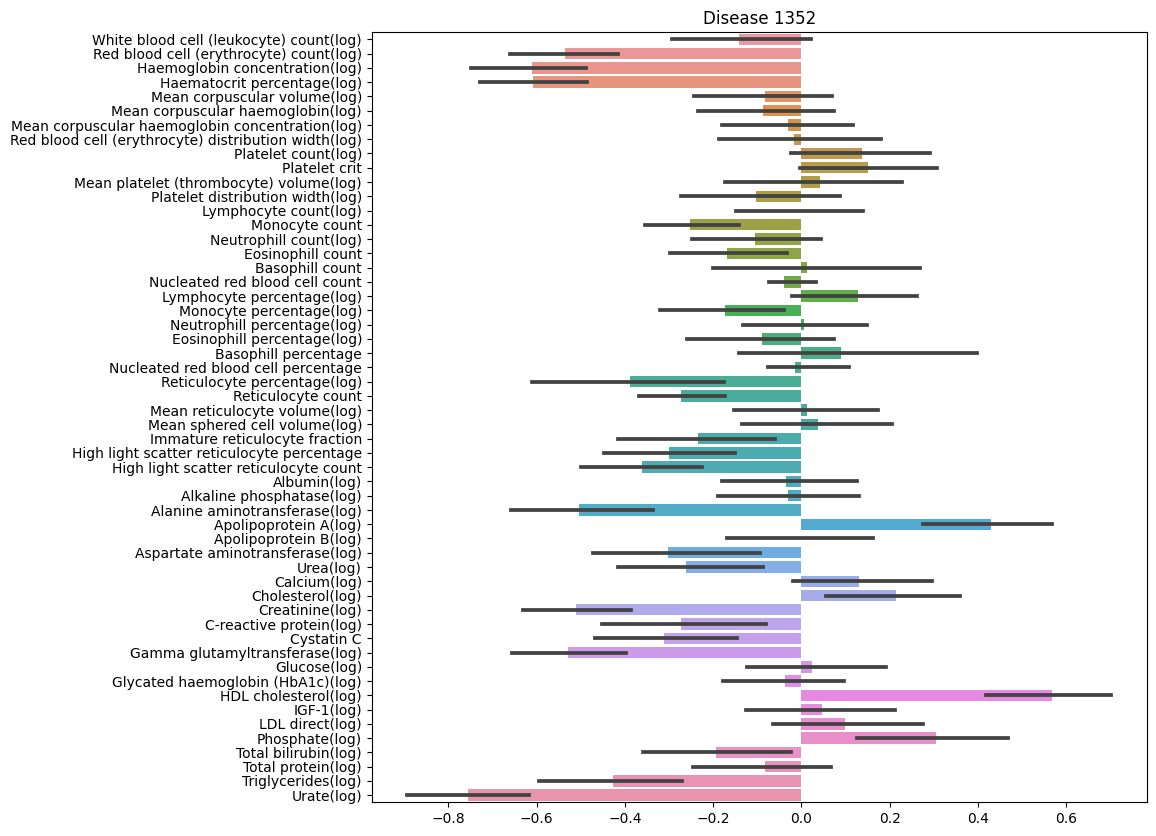

In [17]:
disease_code = 1352
n,m = single_data.shape

# create a new dataframe with the same column names as data0
disease1352 = pd.DataFrame(columns=single_data.columns[0:54])

# search row by row
for i in range(n):
    if single_data.iloc[i, -1] == float(disease_code):
        # add a row to disease1352
        disease1352 = pd.concat([disease1352, pd.DataFrame(single_data.iloc[i, 0:54]).T], axis=0)

# draw a barplot to show the mean and the confidence interval of each feature
plt.figure(figsize=(10, 10))
sns.barplot(data=disease1352, ci=95, orient='h')
plt.title('Disease 1352')
plt.show()

/Users/xt319/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


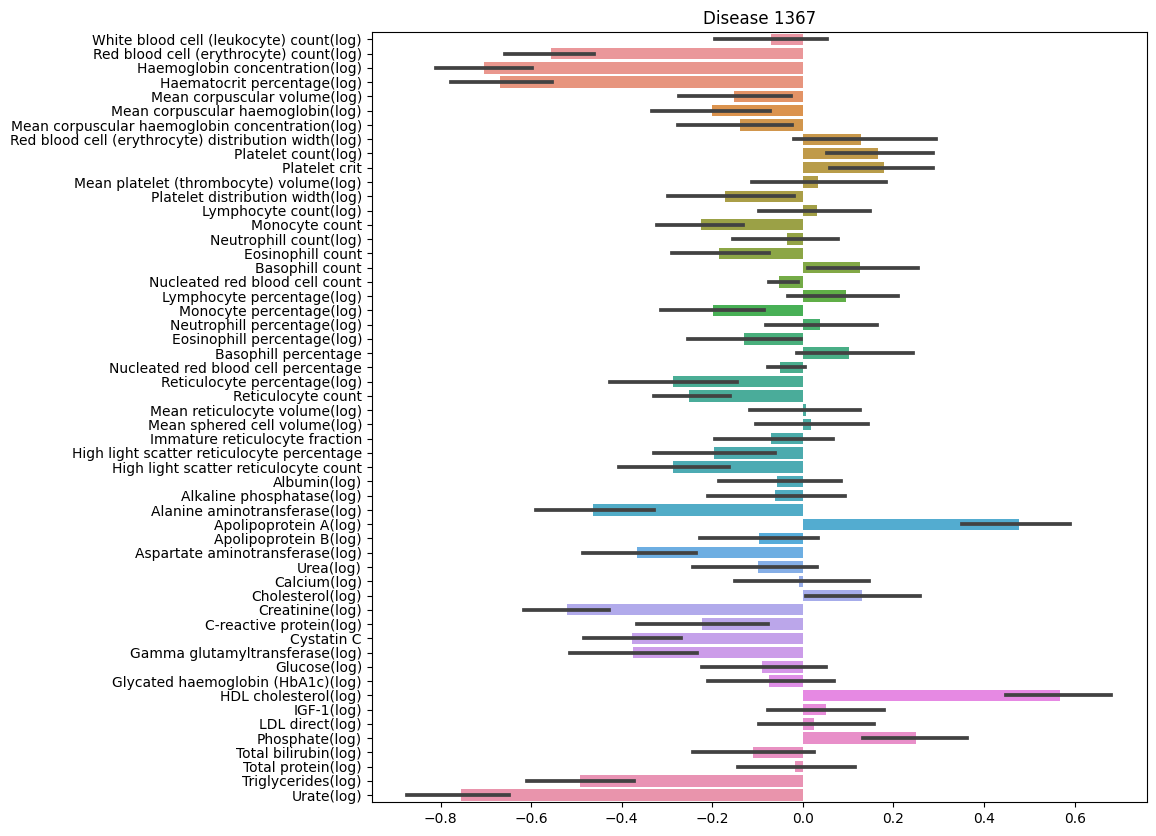

In [18]:
disease_code = 1367
n,m = single_data.shape

# create a new dataframe with the same column names as data0
disease1367 = pd.DataFrame(columns=single_data.columns[0:54])

# search row by row
for i in range(n):
    if single_data.iloc[i, -1] == float(disease_code):
        # add a row to disease1367
        disease1367 = pd.concat([disease1367, pd.DataFrame(single_data.iloc[i, 0:54]).T], axis=0)

# draw a barplot to show the mean and the confidence interval of each feature
plt.figure(figsize=(10, 10))
sns.barplot(data=disease1367, ci=95, orient='h')
plt.title('Disease 1367')
plt.show()

/Users/xt319/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


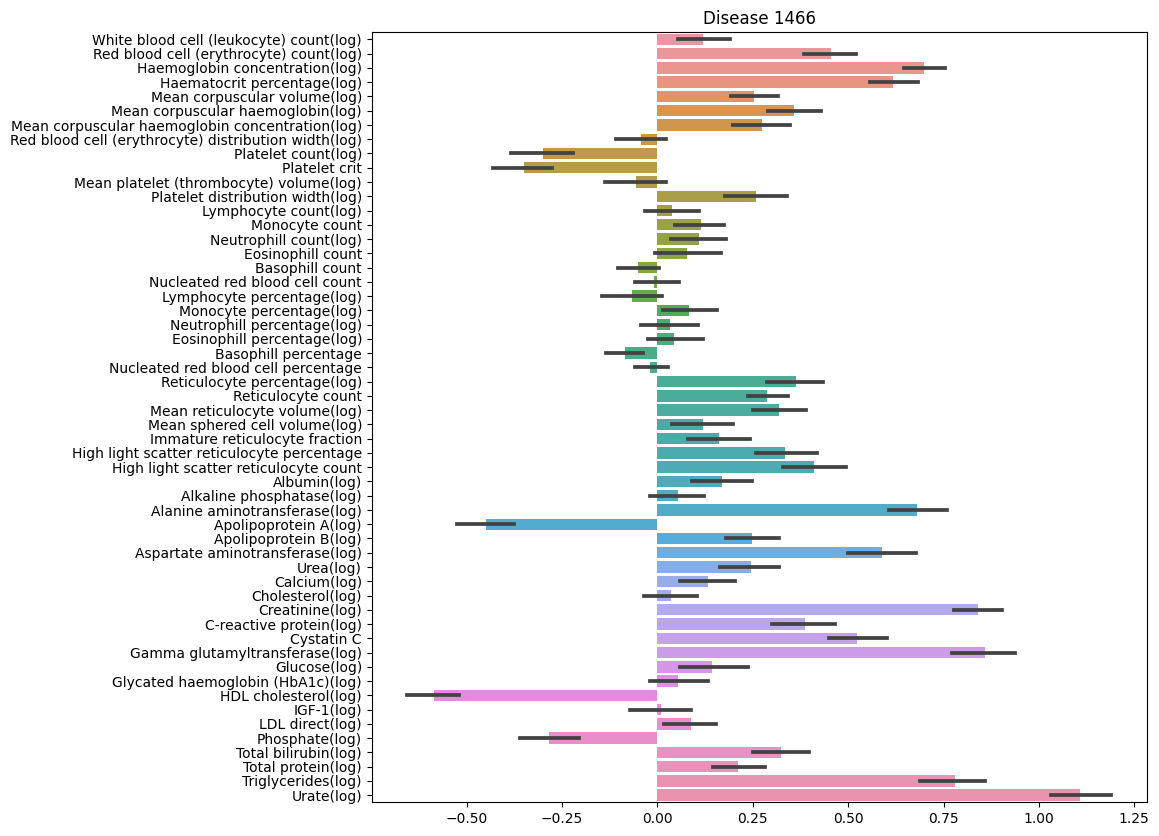

In [19]:
disease_code = 1466
n,m = single_data.shape

# create a new dataframe with the same column names as data0
disease1466 = pd.DataFrame(columns=single_data.columns[0:54])

# search row by row
for i in range(n):
    if single_data.iloc[i, -1] == float(disease_code):
        # add a row to disease1466
        disease1466 = pd.concat([disease1466, pd.DataFrame(single_data.iloc[i, 0:54]).T], axis=0)

# draw a barplot to show the mean and the confidence interval of each feature
plt.figure(figsize=(10, 10))
sns.barplot(data=disease1466, ci=95, orient='h')
plt.title('Disease 1466')
plt.show()

/Users/xt319/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


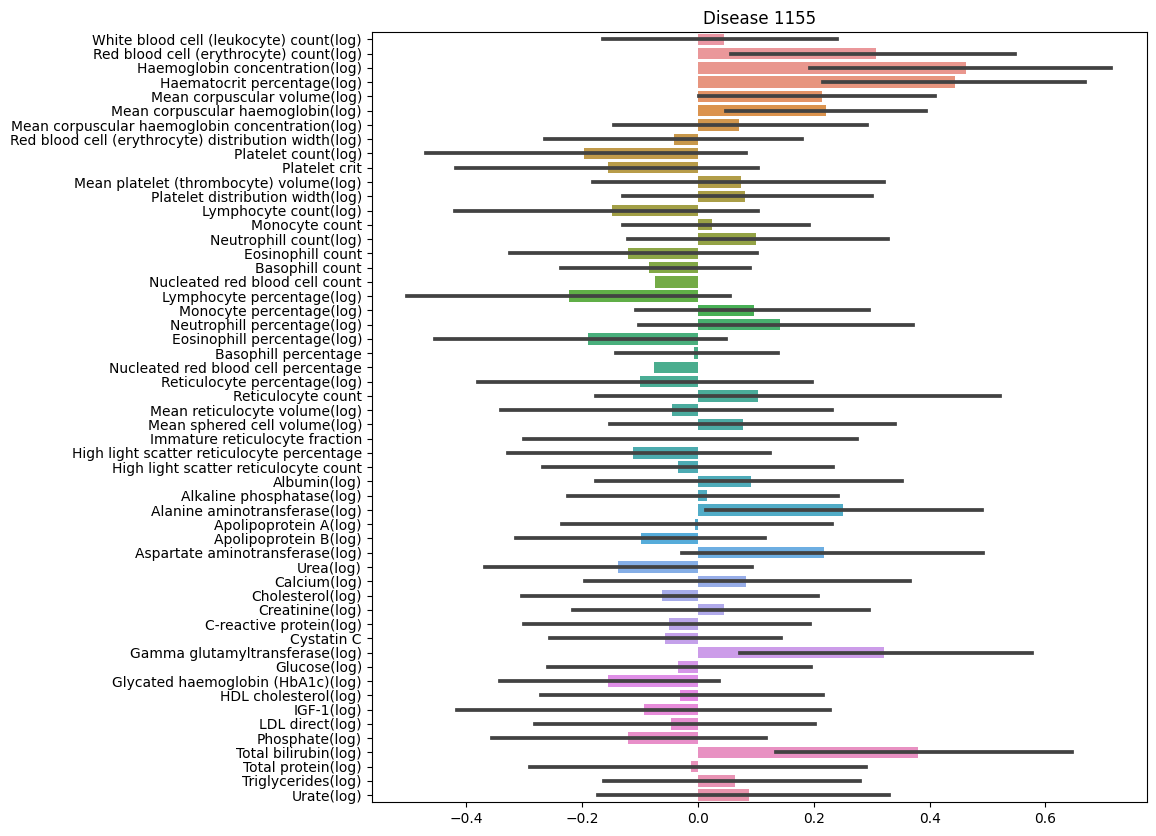

In [20]:
disease_code = 1155
n,m = single_data.shape

# create a new dataframe with the same column names as data0
disease1155 = pd.DataFrame(columns=single_data.columns[0:54])

# search row by row
for i in range(n):
    if single_data.iloc[i, -1] == float(disease_code):
        # add a row to disease1155
        disease1155 = pd.concat([disease1155, pd.DataFrame(single_data.iloc[i, 0:54]).T], axis=0)

# draw a barplot to show the mean and the confidence interval of each feature
plt.figure(figsize=(10, 10))
sns.barplot(data=disease1155, ci=95, orient='h')
plt.title('Disease 1155')
plt.show()

/Users/xt319/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


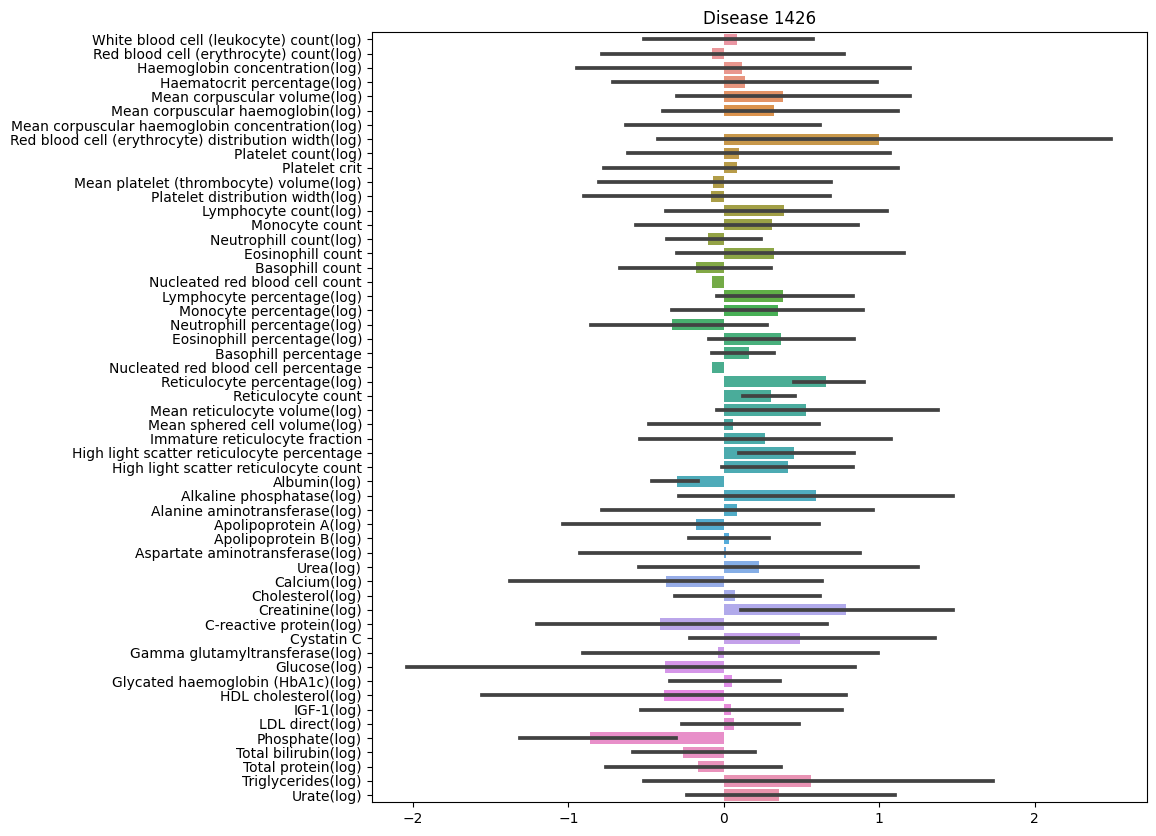

In [21]:
disease_code = 1426
n,m = single_data.shape

# create a new dataframe with the same column names as data0
disease1426 = pd.DataFrame(columns=single_data.columns[0:54])

# search row by row
for i in range(n):
    if single_data.iloc[i, -1] == float(disease_code):
        # add a row to disease1426
        disease1426 = pd.concat([disease1426, pd.DataFrame(single_data.iloc[i, 0:54]).T], axis=0)

# draw a barplot to show the mean and the confidence interval of each feature
plt.figure(figsize=(10, 10))
sns.barplot(data=disease1426, ci=95, orient='h')
plt.title('Disease 1426')
plt.show()

/Users/xt319/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


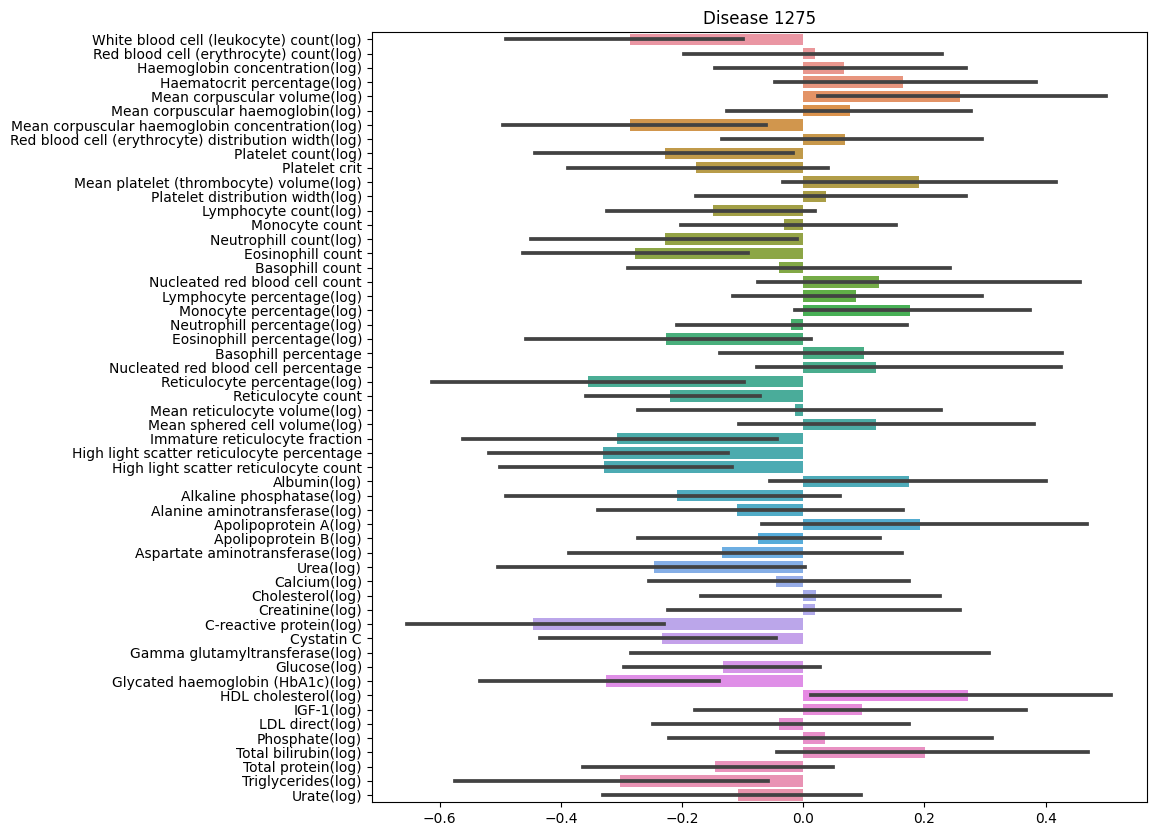

In [22]:
disease_code = 1275
n,m = single_data.shape

# create a new dataframe with the same column names as data0
disease1275 = pd.DataFrame(columns=single_data.columns[0:54])

# search row by row
for i in range(n):
    if single_data.iloc[i, -1] == float(disease_code):
        # add a row to disease1275
        disease1275 = pd.concat([disease1275, pd.DataFrame(single_data.iloc[i, 0:54]).T], axis=0)

# draw a barplot to show the mean and the confidence interval of each feature
plt.figure(figsize=(10, 10))
sns.barplot(data=disease1275, ci=95, orient='h')
plt.title('Disease 1275')
plt.show()

/Users/xt319/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


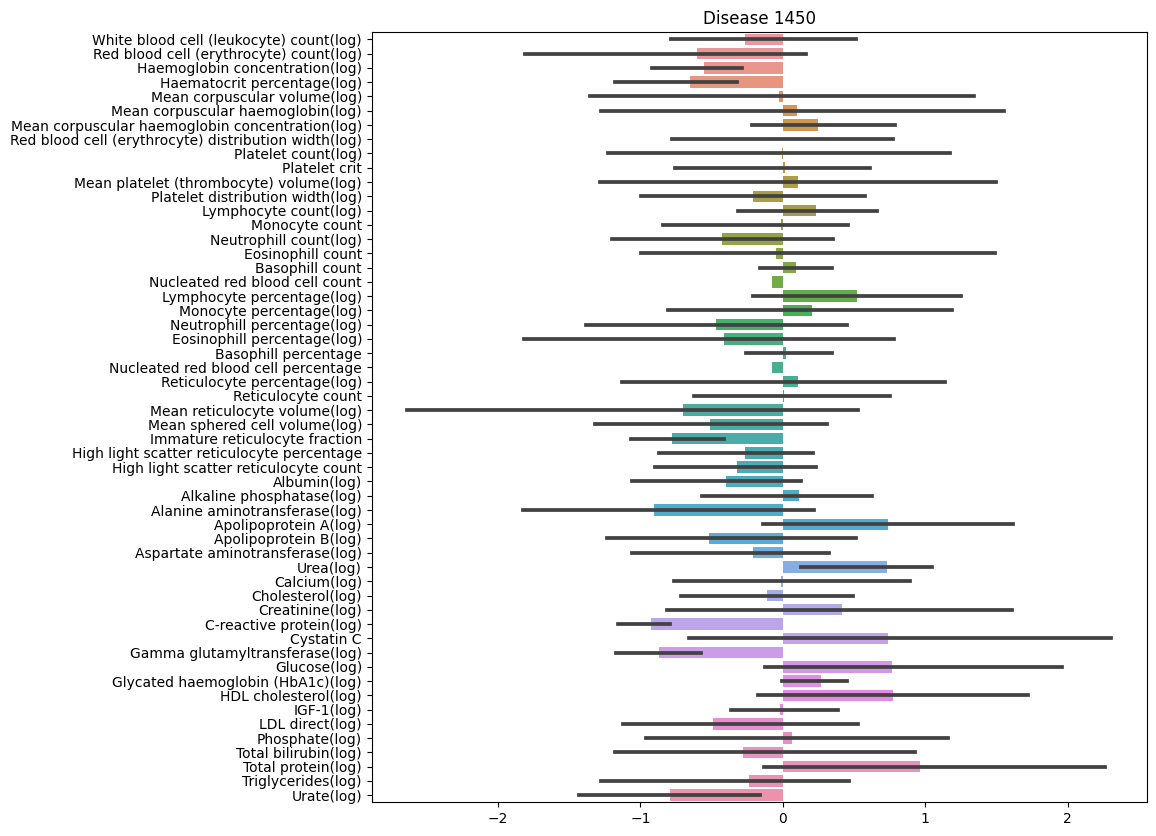

In [23]:
disease_code = 1450
n,m = single_data.shape

# create a new dataframe with the same column names as data0
disease1450 = pd.DataFrame(columns=single_data.columns[0:54])

# search row by row
for i in range(n):
    if single_data.iloc[i, -1] == float(disease_code):
        # add a row to disease1450
        disease1450 = pd.concat([disease1450, pd.DataFrame(single_data.iloc[i, 0:54]).T], axis=0)

# draw a barplot to show the mean and the confidence interval of each feature
plt.figure(figsize=(10, 10))
sns.barplot(data=disease1450, ci=95, orient='h')
plt.title('Disease 1450')
plt.show()

/Users/xt319/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


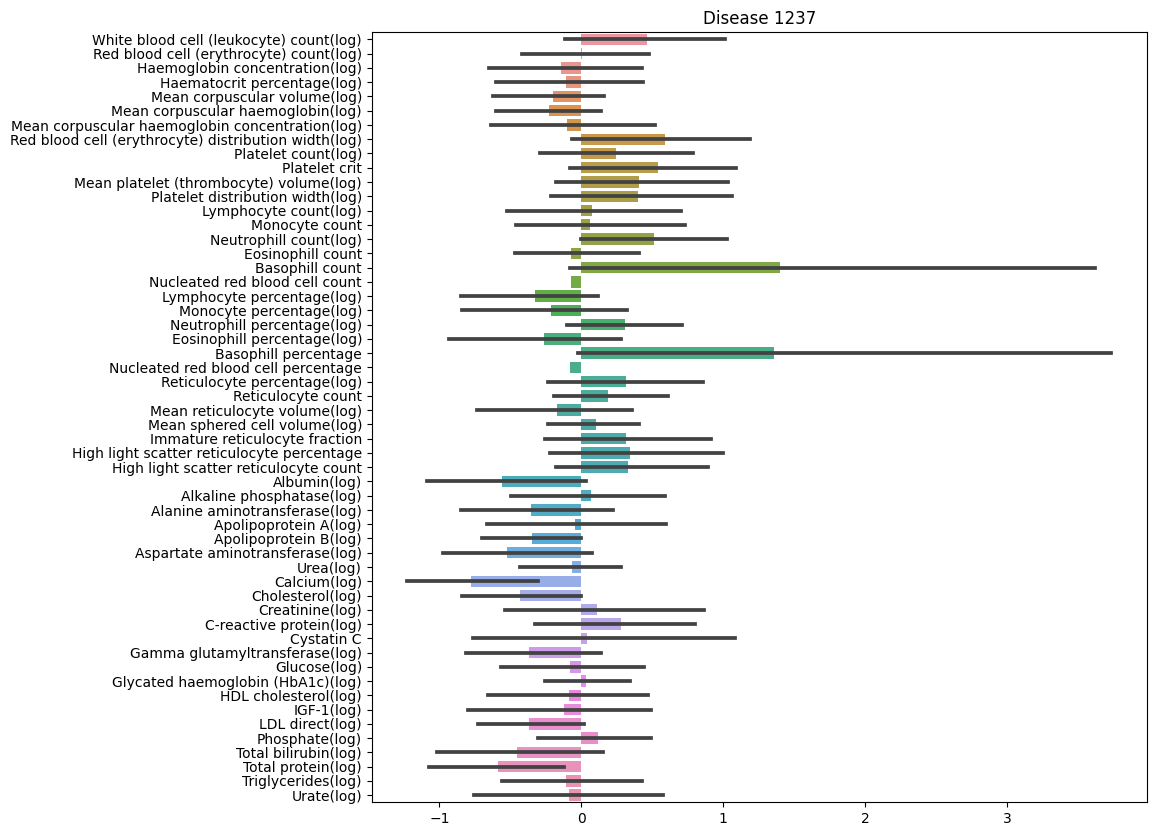

In [24]:
disease_code = 1237
n,m = single_data.shape

# create a new dataframe with the same column names as data0
disease1237 = pd.DataFrame(columns=single_data.columns[0:54])

# search row by row
for i in range(n):
    if single_data.iloc[i, -1] == float(disease_code):
        # add a row to disease1237
        disease1237 = pd.concat([disease1237, pd.DataFrame(single_data.iloc[i, 0:54]).T], axis=0)

# draw a barplot to show the mean and the confidence interval of each feature
plt.figure(figsize=(10, 10))
sns.barplot(data=disease1237, ci=95, orient='h')
plt.title('Disease 1237')
plt.show()

/Users/xt319/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


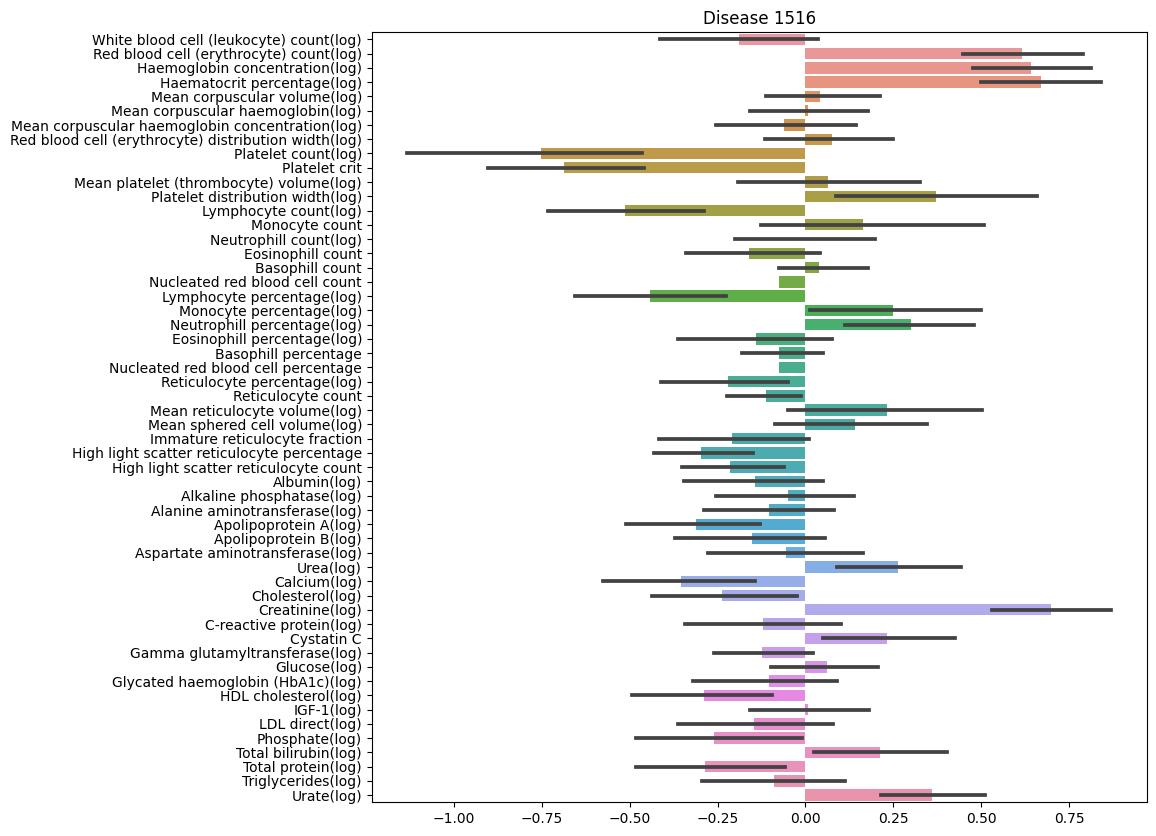

In [25]:
disease_code = 1516
n,m = single_data.shape

# create a new dataframe with the same column names as data0
disease1516 = pd.DataFrame(columns=single_data.columns[0:54])

# search row by row
for i in range(n):
    if single_data.iloc[i, -1] == float(disease_code):
        # add a row to disease1516
        disease1516 = pd.concat([disease1516, pd.DataFrame(single_data.iloc[i, 0:54]).T], axis=0)

# draw a barplot to show the mean and the confidence interval of each feature
plt.figure(figsize=(10, 10))
sns.barplot(data=disease1516, ci=95, orient='h')
plt.title('Disease 1516')
plt.show()

/Users/xt319/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


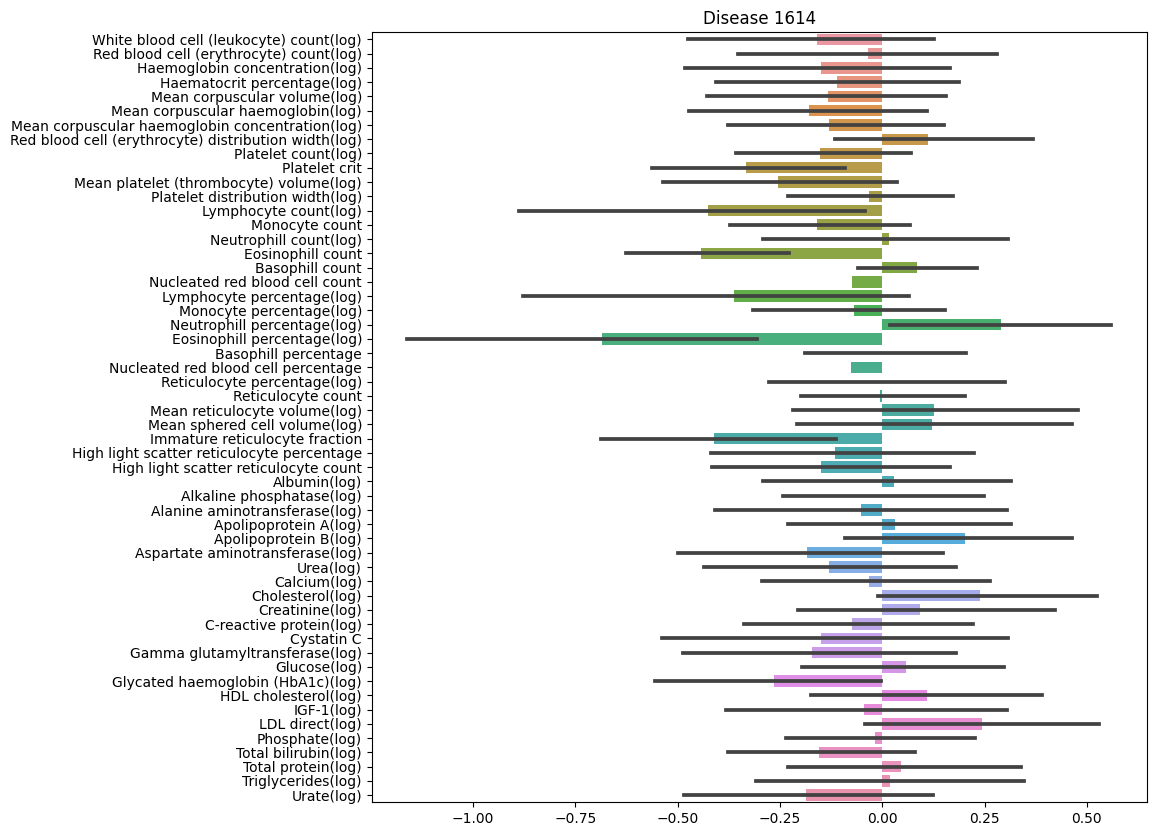

In [26]:
disease_code = 1614
n,m = single_data.shape

# create a new dataframe with the same column names as data0
disease1614 = pd.DataFrame(columns=single_data.columns[0:54])

# search row by row
for i in range(n):
    if single_data.iloc[i, -1] == float(disease_code):
        # add a row to disease1614
        disease1614 = pd.concat([disease1614, pd.DataFrame(single_data.iloc[i, 0:54]).T], axis=0)

# draw a barplot to show the mean and the confidence interval of each feature
plt.figure(figsize=(10, 10))
sns.barplot(data=disease1614, ci=95, orient='h')
plt.title('Disease 1614')
plt.show()

/Users/xt319/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


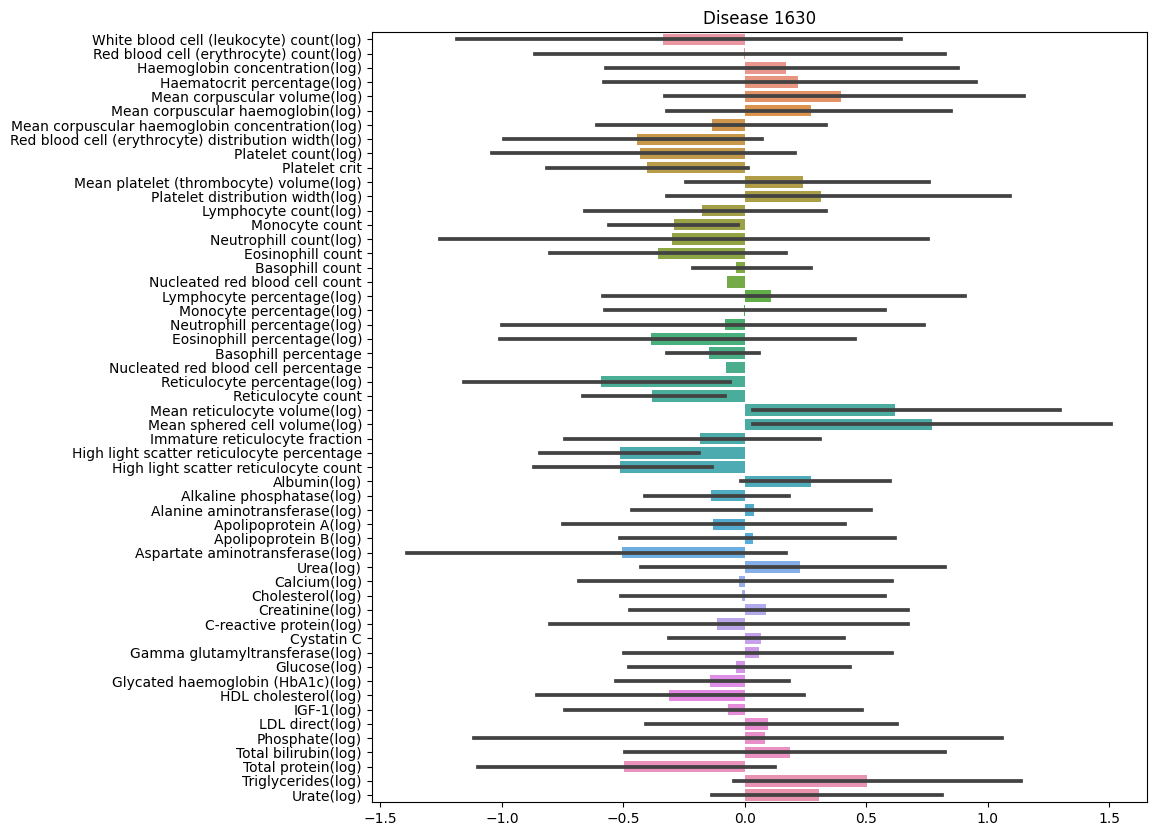

In [27]:
disease_code = 1630
n,m = single_data.shape

# create a new dataframe with the same column names as data0
disease1630 = pd.DataFrame(columns=single_data.columns[0:54])

# search row by row
for i in range(n):
    if single_data.iloc[i, -1] == float(disease_code):
        # add a row to disease1630
        disease1630 = pd.concat([disease1630, pd.DataFrame(single_data.iloc[i, 0:54]).T], axis=0)

# draw a barplot to show the mean and the confidence interval of each feature
plt.figure(figsize=(10, 10))
sns.barplot(data=disease1630, ci=95, orient='h')
plt.title('Disease 1630')
plt.show()